# CA1 pyramidal cell model specifics
Specifics of the the parameterization for the morphologically detailed CA1 pyramidal cell used in the event-based encodings manuscript. 

This models uses morphology originally from https://doi.org/10.1002/cne.903620103 and hosted on NeuroMorpho.org (https://doi.org/10.1523/jneurosci.2055-07.2007).

The model is based off of Tom Morse's implementation: model 87284 on ModelDB.

Our implementation recieves stimuli independently from 10 excitatory and 5 inhibitory synapses at random locations in the cell's dendrites. 

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import plotly

from neuron import h
from neuron.units import mV, ms
h.load_file("stdrun.hoc")
h.load_file("stdlib.hoc")
h.load_file("import3d.hoc")

import sys
sys.path.insert(1, "../utils/")
import Stimuli, Pyr

## set up cell

In [2]:
print('creating stimuli')
duration = 300

stim_params = Stimuli.ExperimentalStimParams()
stim_scaffold = stim_params.stim_scaffold['pyr']
segment_array = np.random.randint(0, 192, len(stim_scaffold['stim_type_array'])) 
    # 192 is the length of connection points
stimuli = Stimuli.MorphoStimuli('stimset0', stim_scaffold['stim_type_array'], segment_array, stim_scaffold, duration)
        
print('setting up cell')
pyr = Pyr.Pyr(recording=True)
print('adding stimuli')
pyr.add_stimuli(stimuli)
print('running simulation')
pyr.run_simulation(duration)
print('simulation ended')

creating stimuli
setting up cell
adding stimuli
running simulation
simulation ended


In [10]:
len(os.listdir())

9

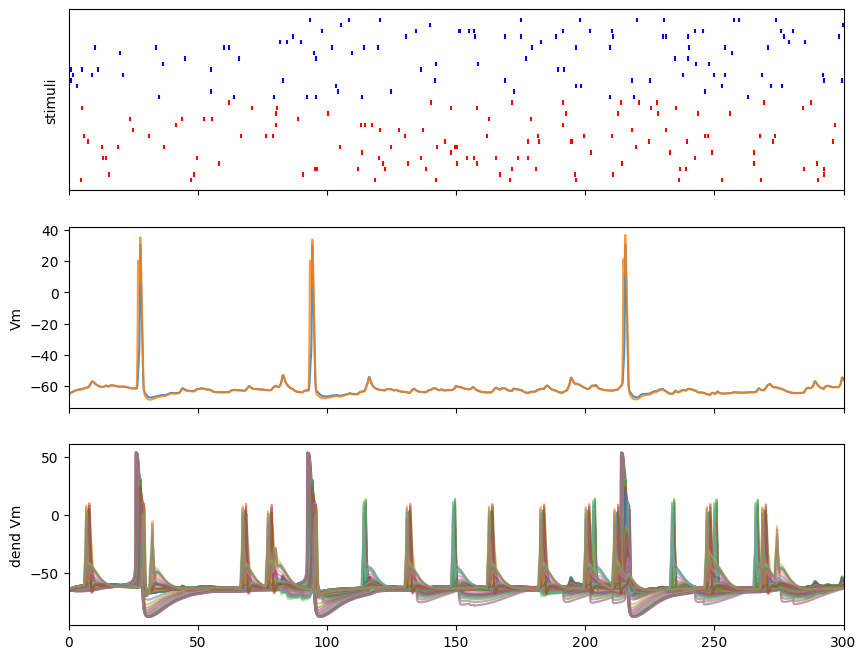

In [3]:
fig, axes = plt.subplots(3,1, figsize=(10, 8), sharex=True)

stimuli_colors = {
    'ex':'red',
    'in':'blue'
}

for i, stimulus in enumerate(stimuli.stimuli):
    axes[0].vlines(stimulus.event_times, i-0.4, i+0.4, color=stimuli_colors[stimulus._id])

for _v, seg_loc in zip(pyr._vs, pyr.all_seg_locs):
    if seg_loc == 'soma':
        axes[1].plot(pyr._t, _v, alpha=0.8)
    elif seg_loc == 'axon':
        axes[1].plot(pyr._t, _v, alpha=0.8)
    else:
        axes[2].plot(pyr._t, _v, alpha=0.5)
        
axes[0].set_yticks([])
axes[0].set_ylabel('stimuli')
axes[1].set_ylabel('Vm')
axes[2].set_ylabel('dend Vm')

axes[-1].set_xlim(0, duration)

plt.show()

In [6]:
len(pyr.spike_times)

3

## get spiking histories